<a href="https://colab.research.google.com/github/standungan/mnist_CNN/blob/master/klasifikasiMNIST_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Intro

Pada artikel kali ini kita akan mencoba membuat salah satu jenis model Jaringan Syaraf Tiruan yang memiliki keunikan dari arsitektur atau susunan layernya dibandingkan dengan model JST lainnya, yaitu Convolutional Neural Network.

Convolutional Neural Network (CNN) pertama kali diperkenalkan oleh Yann LeCun pada tahun 1988. CNN merupakan salah satu metode yang mengawali kemunculan dan kesuksesan Deep Learning.

Pada tahun 1950-an Hubel dan Wisel melakukan eksperimen pada salah satu bagian otak kucing yaitu visual cortex. mereka menemukan bahwa visual cortex memiliki bagian kecil berupa sel-sel yang sensitif terhadap area tertentu pada pandangan mata. Hubel dan Wisel menemukan 2 tipe visual cortex, yaitu simple cell dan complex cell. Berdasarkan hasil pengamatan ini, pada tahun 1980-an Kunihiko Fukushima merancang Neocognitron yang merupakan model Hierarchical Multilayered Neural Network. Model tersebut telah digunakan pada beberapa kasus seperti klasifikasi karakter dari tulisan tangan (Handwritten Character Recognition). model inilah yang menjadi inspirasi dari Convolutional Neural Network.

CNN memiliki kesamaan struktur dengan artificial neural network. Pada kasus klasifikasi citra, CNN menerima citra input atau masukan kemudian diproses dan diklasifikasi ke kategori tertentu (mis. pesawat, kapal, burung, kucing, sapi). 

Yang membedakan CNN dengan ANN adalah CNN memiliki arsitektur tambahan yang dioptimisasi untuk fitur yang ada pada citra input. komponen-komponen utama yang ada di dalam Convolutional Neural Networks adalah:
1. Input layer
2. Convolution Layer
3. Activation Function
4. Pooling Layer
5. Fully Connected Layer

Pada gambar di bawah ini bisa dilihat alur dari proses CNN dalam mengolah citra masukan sampai mengklasifikasikan citra tersebut ke kategori tertentu berdasarkan nilai keluarannya.

<img src="https://github.com/standungan/images/blob/master/CNNflow.jpeg?raw=true"/>

#### Input Layer
Input layer menampung nilai piksel dari citra yang menjadi masukan. Untuk citra dengan ukuran 64x64 dengan 3 channel warna, RGB(Red, Green, Blue) maka yang menjadi masukan akan adalah piksel array yang berukuran 64x64x3.

<img src="https://github.com/standungan/images/blob/master/rgb_example.jpg?raw=true"/>
#### Convolution Layer
Convolution Layer adalah inti dari dari CNN. Convolution Layer menghasilkan citra baru yang menunjukkan fitur dari citra input. Dalam proses tersebut, Convolution Layer menggunakan filter pada setiap citra yang menjadi masukan. Filter pada layer ini berupa array 2 dimensi bisa berukuran 5x5, 3x3 atau 1x1. Proses convolution dengan menggunakan filter pada layer ini akan menghasikan feature map yang akan digunakan pada activation layer. Gambar dibawah ini menunjukkan alur pada Convolution Layer.
<img src="https://github.com/standungan/images/blob/master/convLayer.gif?raw=true"/>
#### Activation Layer
Activation Layer adalah layer dimana feature map dimasukkan ke dalam fungsi aktifasi. Fungsi aktifasi digunakan untuk mengubah nilai-nilai pada feature map pada range tertentu sesuai dengan fungsi aktifasi yang digunakan. ini bertujuan untuk meneruskan nilai yang menampilkan fitur dominan dari citra yang masuk ke layer berikutnya. Fungsi aktifasi yang umum digunakan bisa dilihat pada gambar berikut.

<img src="https://github.com/standungan/images/blob/master/actFunc.png?raw=true"/>
#### Pooling Layer
Pooling layer menerima input dari activation layer kemudia mengurangi jumlah paramaternya. Poling juga biasa disebut subsampling atau downsampling yang mengurangi dimensi dari feature map tanpa menghilangkan informasi penting di dalamnya. Proses dalam pooling layer cukup sederhana. pertama-tama kita menentukan ukuran downsampling yang akan digunakan pada feature map, misalnya 2x2. Setelah itu kta akan melakukan proses pooling pada feature map, sebagai contoh kita akan menggunakan feature map berukuran 4x4 berikut.

<img src="https://github.com/standungan/images/blob/master/featMap.PNG?raw=true"/>

setelah itu kita akan menggunakan matrix 2x2 untuk melakukan proses pooling. proses Pooling sendiri ada beberapa macam seperti Max pooling, Mean pooling
Sum pooling.

<img src="https://github.com/standungan/images/blob/master/pool_img.PNG?raw=true"/>

#### Fully Connected Layer
setelah melewati proses-proses diatas, hasil dari pooling layer digunakan menjadi masukan untuk Fully connected layer. Layer ini memiliki kesamaan struktur dengan Artificial Neural Network pada umumnya yaitu memiliki input layer, hidden layer dan output layer yang masing-masing memiliki neuron-neruon yang saling terhubung dengan neuron-neuron di layer tetangganya. gambar di bawah ini merupakan contoh Fully Connected Layer.

<img src="https://github.com/standungan/images/blob/master/sampleFCN.png?raw=true"/>

pada gambar diatas dapat dilihat sebelum hasil pooling digunakan sebagai input, hasil pooling terlebih dahulu diubah menjadi vektor (x1, x2, x3, dst) kemudian dari sini diproses ke dalam Fully Connected Layer. Pada layer terakhir di dalam Fully Connected layer akan digunakan fungsi aktifasi sigmoid atau softmax untuk menentukan klasifikasi dari citra inputan atau masukan yang dari Input Layer CNN.

<img src="https://github.com/standungan/images/blob/master/example.png?raw=true"/>


## Summary

Proses Convolutional Neural Network pada penjelasan diatas dapat diringkas seperti berikut : 

1. Membaca Input, misal citra, kemudian dijadikan input untuk convolution layer
2. menentukan parameter seperti filter kemudian menjalankan proses convolution pada citra masukan.
3. setelah proses convolution selesai, hasilnya dimasukkan kedalam fungsi aktifasi, misalnya ReLU.
4. hasil fungsi aktifasi ReLU mengalami proses downsampling pada Pooling layer
5. hasil dari Pooling dapat digunakan sebagai input untuk melalui thaap 2 - 4 atau dijadikan input untuk Fully Connected Layer
6. sebelum hasil pooling menjadi input untuk Fully Connected Layer, perlu untuk meengubah hasil pooling menjadi vektor.
7. output layer dari Fully Connected Layer menggunakan fungsi aktifasi untuk menentukan klasifikasi dari citra yang dibaca pada tahap 1.


# Studi Kasus Convolution Neural Network
## Klasifikasi MNIST Handwritten Dataset

setelah membahas Convolutional Neural Network secara umum. Kali ini kita akan merancang CNN untuk mengenali angka yang ditulis dengan tangan. Dataset yang akan kita gunakan adalah MNIST Handwritten Dataset.MNIST dataset memiliki 70.000 citra grayscale angka 0-9 yang ditulis dengan tangan. semua citra dalam dataset ini berukuran 28x28 piksel. kita akan menggunakan data-data ini sebagai inputan atau masukan dan melakukan klasifikasi angka pada suatu gambar berikut dengan nilai probabilitas atau confidence dari hasil klasifikasinya.

<img src="https://github.com/standungan/images/blob/master/mnistCase.png?raw=true"/>

pertama kita perlu memanggil module-module python dengan perintah import. kita akan menggunakan framework Tensorflow dan Keras untuk merancang CNN.

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import numpy as np
import os
import sys
import IPython
from six.moves import urllib

print(tf.__version__)

1.13.0-rc0


tahap berikutnya adalah memanggil MNIST Dataset dari folder keras. tiap citra dalam dataset ini adalah Numpy Array dengan ukuran 28x28 dengan nilai piksel antara 0-255. tiap citra juga memiliki label atau target dengan nilai integer 0-9.

In [0]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

11493376/11490434 [==============================] - 0s 0us/step


nilai piksel dari citra dalam dataset akan dinormalisasi terlebih dahulu sebelum digunakan sebagai input untuk model CNN.

In [0]:
def preprocess_images(images):
    sample_image = images if len(images.shape) == 2 else images[0]
    assert sample_image.shape in [(28, 28, 1), (28, 28)], sample_image.shape
    return images / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

untuk melihat contoh citra dari MNIST dataset, gunakan code dibawah ini.

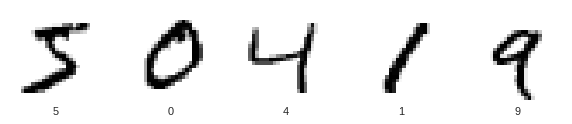

In [0]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

#### Build CNN Model
Untuk merancang model CNN, kita perlu untuk memanggil layer yang dibutuhkan dan melakukan konfigurasi pada masing-masing layer. Dengan menggunakan framework Keras, kita dapat dengan mudah membuat layer-layer untuk merancang Convolution Neural Network.

In [0]:
modelCNN = keras.Sequential()

#code dibawah ini melakukan menghasilkan convolution layer yang menerima 
#input dengan ukuran 28x28x1 
#layer ini memiliki 32 filter masing-masing filter berukuran 3x3 
#yang kemudian akan dimasukkan ke activation layer
#fungsi aktifasi yang digunakan adalah ReLU (Rectified Linear Unit).
modelCNN.add(Conv2D(32,
                    kernel_size=(3,3), 
                    activation='relu', 
                    input_shape=(28,28,1)))

#pada model CNN ini, kita akan menambahkan convolutional layer yang akan 
#memproses hasil convolutional layer di atas.
modelCNN.add(Conv2D(64,
                    kernel_size=(3,3), 
                    activation='relu'))

#code ini menghasilkan pooling layer dengan ukuran 2x2
modelCNN.add(MaxPooling2D(pool_size=(2,2)))

#pada kita akan menggunakan DropOut layer, ini berfungsi untuk
#meningkatkan kinerja CNN pada proses klasifikasi
modelCNN.add(Dropout(0.25))

#sebelum hasil layer di atas digunakan untuk Fully Connected Layer
#perlu untuk mengubah hasil tersebut menjadi vektor dengan menggunakan code berikut
modelCNN.add(Flatten())

#dengan code dibawah ini kita akan membuat Fully Connected Layer yang memiliki
# 1 hidden layer dengan 128 neuron. fungsi aktfiasi pada layer ini menggunakan
# ReLU
modelCNN.add(Dense(128, activation='relu'))

modelCNN.add(Dropout(0.5))

#code ini bertujuan untuk konfigurasi output layer. pada layer ini
#kita akan menggunakan fungsi aktifasi softmax untuk menghasilkan
#nilai output dalam bentuk probabilitas
modelCNN.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Dengan code di atas kita sudah selesai merancang CNN untuk klasifikasi citra. sebelum lanjut ke proses latih atau training, kita perlu untuk melakukan konfigurasi:
1. Loss function - berfungsi untuk mengukur tingkat error atau kesalahan model selama proses latih. Proses latih berjalan untuk mengurangi nilai error.
2. Optimizer - fungsi ini menjalankan proses perubahan bobot yang ada di dalam model berdasarkan data atau citra yang menjadi masukan dan hasil dari loss function
3. Metrics - digunakan untuk melihat kinerja model CNN setelah melalu proses latih dan uji (testing). kita akan menggunakan nilai Akurasi (accuracy) yang menunjukkan perbandingan jumlah citra yang diklasifikasi dengan benar dan jumlah citra yang digunakan pada proses uji.

In [0]:
modelCNN.compile(optimizer=tf.train.AdamOptimizer(),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

#### Proses Latih model CNN
Tahapan proses latih model CNN sebagai berikut:
1. gunakan data latih (train_images, train_labels) sebagai inputan atau masukan
2. model CNN akan mencoba untuk mencari hubungan antara citra masukan dengan label citra tersebut
3. model CNN kemudian melakukan proses klasifikasi dengan menggunakan data uji (test_images). hasil dari klasifikasi tersebut akan dicocokkan dengan hasil sebenarnya (test_labels).

untuk memulai proses latih gunakan code di bawah ini.

In [0]:
recordTraining = modelCNN.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 171s 3ms/sample - loss: 0.1936 - acc: 0.9413
Epoch 2/5
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.0812 - acc: 0.9753
Epoch 3/5
60000/60000 [==============================] - 169s 3ms/sample - loss: 0.0598 - acc: 0.9825
Epoch 4/5
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.0483 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 169s 3ms/sample - loss: 0.0411 - acc: 0.9869


output di atas menampilkan hasil loss function dan akurasi selama proses training model CNN yang telah kita rancang sebelumnya. proses training di atas berjalan di Google Colaboratory. jika menggunakan PC atau Laptop yang umum digunakan orang, proses latih akan membutuhkan waktu yang lebih lama.

Setelah epoch 5, dapat dilihat bahwa model CNN memiliki hasil loss function sama dengan 0.0411 dan akurasi 98.69% untuk data latih. selanjutnya kita akan melakukan tahapan nomor 3 yaitu melakukan klasifikasi dengan menggunakan data uji.

In [0]:
print('Jumlah data uji', test_images.shape[0])
print('Ukuran data uji', test_images.shape[1:4])

test_loss, test_accuracy = modelCNN.evaluate(test_images, test_labels)

print('Akurasi proses uji : ', test_accuracy)

Jumlah data uji 10000
Ukuran data uji (28, 28, 1)
10000/10000 [==============================] - 7s 745us/sample - loss: 0.0282 - acc: 0.9914
Akurasi proses uji :  0.9914


model CNN  yang telah kita rancang mencapai akurasi 99.14%. Ini menandakan CNN yang telah kita rancang berhasil mengenali data yang belum pernah sama sekali digunakan selama proses latih. langkah selanjutnya kita akan mencoba menggunakan model CNN untuk melakukan klasifikasi untuk kasus di bawah ini

<img src="https://i.imgur.com/OrUJs9V.gif"/>


In [0]:
videoURL = 'https://github.com/lexfridman/mit-deep-learning/raw/master/tutorial_deep_learning_basics/images/mnist_dream.mp4'

mnistVideoPath = urllib.request.urlretrieve(videoURL)[0]

def cv2_imshow(image):
  ret = cv2.imencode('.png',img)[1].tobytes()
  imgDisplay = IPython.display.Image(data=ret)
  IPython.display.display(img_ip)
 
cap = cv2.VideoCapture(mnistVideoPath)
vw = None
frame = -1

while True:
  frame += 1
  ret, image = cap.read()
  if not ret:
    break
   
  assert image.shape[0] == image.shape[1]
  if image.shape[0] != 720:
    image = cv2.resize(image, (720, 720))
   
  "preprocessing frame sebelum dijadikan input untuk model CNN"
  img1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  img1 = cv2.resize(im1, (28, 28))
  img1 = preprocess_images(img1)
  img1 = 1 - img1
  
  netIN = np.expand_dims(img1, axis=0)
  netIN = np.expand_dims(netIN, axis=3)
  
  preds = model.predict(netIN)[0]
  result = np.argmax(preds)
  persentase = np.rint(preds * 100).astype(int)
  
  image = 255 - image
  pad_color = 0
  image = np.pad(image, ((0,0),(0,1280-720),(0,0)), mode'constant', constant_values=(pad_color))
  
  line_type = cv.LINE_AA
  font_Style = cv2.FONT_HERSHEY_SIMPLEX
  font_Scale = 1.3
  thickness = 2
  x, y = 720, 60
  color = (255,255,255)
  
  text = "Hasil Klasifikasi CNN :"
  cv2.putText(image, text=text, org=(x, y), 
              fontScale=font_Scale, fontFace=font_Style, 
              thickness=thickness, color=color, lineType=line_type)
  
  text = "Masukan :"
  cv2.putText(image, text=text, org=(30, y), 
              fontScale=font_Scale, fontFace=font_Style, 
              thickness=thickness, color=color, lineType=line_type)
  
  y = 130
  for i, p in enumerate(percentase):
    if i == guess:
      color = (255, 220, 220)
    else:
      color = (100, 100, 100)
    
    rect_width = 0
    if p > 0:
      rect_width = int(p*3.3)
    
    rect_start = 180
    cv.rectangle(image, (x+rect_start, y-5), (x+rect_start+rect_width, y-20), color, -1)
    
    text = '{}: {:>3}%'.format(i, int(p))
    cv2.putText(image, text=text, org=(x, y), 
              fontScale=font_Scale, fontFace=font_Style, 
              thickness=thickness, color=color, lineType=line_type)
    
    y+=60
   
  save_video = True
  
  if save_video:
    if vw is None:
      